#**Calculadora para Teste AB**




## **Importanto bibliotecas e funções**

In [ ]:
#importando as bibliotecas básicas
import pandas as pd
import numpy as np

#importando a bibliotecas usadas no cálculo de amostra
from math import ceil
from scipy.stats import norm
from scipy.stats import ttest_ind

#importando as bibliotecas usadas na parte dos testes estatísticos
import statsmodels.stats.api as sms
from scipy.stats import norm

#importando as bibliotecas usadas na parte dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## **Importanto os dados**


Baixe a base de dados [aqui](https://docs.google.com/spreadsheets/d/1hch1u02cDVMZjEASKCiE80SAFwiU7HbaqRApmU_JLog/edit#gid=2139974958).

In [ ]:
#Importando o dataset controle

from google.colab import drive
drive.mount('/content/drive')
controle = pd.read_excel('/content/drive/MyDrive/Sirius/case_foodtech/controle.xlsx')
controle

Mounted at /content/drive


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
0,100001,lanches,0,sao paulo,1
1,100002,lanches,0,sao paulo,0
2,100003,lanches,0,sao paulo,1
3,100004,lanches,0,sao paulo,1
4,100005,lanches,0,sao paulo,1
...,...,...,...,...,...
4994,104995,saudável,0,rio de janeiro,1
4995,104996,saudável,0,rio de janeiro,1
4996,104997,saudável,0,rio de janeiro,1
4997,104998,saudável,0,rio de janeiro,1


In [ ]:
#Importando o dataset tratamento - voucher 15

from google.colab import drive
drive.mount('/content/drive')
voucher15 = pd.read_excel('/content/drive/MyDrive/Sirius/case_foodtech/voucher15.xlsx')
voucher15

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
0,105000,lanches,15,sao paulo,1
1,105001,lanches,15,sao paulo,0
2,105002,lanches,15,sao paulo,0
3,105003,lanches,15,sao paulo,1
4,105004,lanches,15,sao paulo,1
...,...,...,...,...,...
4994,109994,saudável,15,rio de janeiro,1
4995,109995,saudável,15,rio de janeiro,1
4996,109996,saudável,15,rio de janeiro,0
4997,109997,saudável,15,rio de janeiro,1


In [ ]:
#Importando o dataset tratamento - voucher 25

from google.colab import drive
drive.mount('/content/drive')
voucher25 = pd.read_excel('/content/drive/MyDrive/Sirius/case_foodtech/voucher25.xlsx')
voucher25

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
0,109999,lanches,25,sao paulo,1
1,110000,lanches,25,sao paulo,1
2,110001,lanches,25,sao paulo,1
3,110002,lanches,25,sao paulo,1
4,110003,lanches,25,sao paulo,1
...,...,...,...,...,...
4994,114993,saudável,25,rio de janeiro,1
4995,114994,saudável,25,rio de janeiro,1
4996,114995,saudável,25,rio de janeiro,1
4997,114996,saudável,25,rio de janeiro,1


## **A - Calcular o tamanho da amostra**


In [ ]:
#Define a função que cálcula a amostra
def sample_size_relative_error(max_lift_error, confidence_level, control_rate):
  # Calcula a taxa alternativa adicionando o erro máximo permitido à taxa de controle
  alternative_rate = (1+max_lift_error)*control_rate

  # Calcula a média das taxas de controle e alternativa
  avg_rates = (control_rate+alternative_rate)/2

  # Calcula o nível de significância a partir do nível de confiança
  significance = 1-(1-confidence_level)/2

  # Obtém o quantil z correspondente ao nível de significância
  z_quantile = norm.ppf(significance)

  # Calcula o primeiro termo temporário para a fórmula do tamanho da amostra
  temp_term_1 = avg_rates*(1-avg_rates)

  # Calcula o segundo termo temporário para a fórmula do tamanho da amostra
  temp_term_2 = (control_rate-alternative_rate) **2

  # Calcula o tamanho da amostra necessário para atingir o erro máximo permitido com o nível de confiança desejado
  n = (z_quantile**2)*2*temp_term_1/(temp_term_2)

  # Retorna o tamanho da amostra
  return n

In [ ]:
#Calcula a amostra com base nos dados passados no enunciado

control_rate = 0.7
confidence_level = 0.95
max_lift_error = 0.03

sample_size_relative_error(max_lift_error, confidence_level, control_rate)

3583.440836570831

Pelo cálculo da amostra realizado, cada grupo deve ter 3583 indivíduos.

## **B - Amostragem - Selecionar do dataset apenas os dados referentes ao tamanho de amostra**


In [ ]:
#realizando amostragem para o grupo controle

# Definindo o tamanho da amostra desejada
tamanho_amostra = 3583

# Parâmetros da distribuição normal
desvio_padrao_controle = controle['teve_pedido'].std()
media_controle = controle['teve_pedido'].mean()

# Gerando números aleatórios de uma distribuição normal
amostra_indices_controle = np.random.choice(controle.index, size=tamanho_amostra, replace=False)

# Selecionando os dados correspondentes aos índices amostrados
amostra_controle = controle.loc[amostra_indices_controle]

# Mostre a amostra

amostra_controle


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
2230,102231,brasileira,0,belo horizonte,1
2732,102733,italiana,0,sao paulo,1
2122,102123,brasileira,0,belo horizonte,1
337,100338,lanches,0,sao paulo,1
2818,102819,italiana,0,sao paulo,0
...,...,...,...,...,...
2966,102967,italiana,0,belo horizonte,1
2059,102060,brasileira,0,sao paulo,1
4636,104637,saudável,0,belo horizonte,1
4501,104502,saudável,0,sao paulo,1


In [ ]:
#unindo os datasets de tratamento
dados_combinados = pd.concat([controle, voucher15, voucher25], ignore_index=True)


# Definindo o tamanho da amostra desejada
tamanho_amostra = 3583

# Parâmetros da distribuição normal
desvio_padrao_combinados = dados_combinados['teve_pedido'].std()
media_combinados = dados_combinados['teve_pedido'].mean()

# Gerando números aleatórios de uma distribuição normal
amostra_indices_combinados = np.random.choice(dados_combinados.index, size=tamanho_amostra, replace=False)

# Selecionando os dados correspondentes aos índices amostrados
amostra_combinados = dados_combinados.loc[amostra_indices_controle]

# Mostre a amostra

amostra_combinados

,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
2230,102231,brasileira,0,belo horizonte,1
2732,102733,italiana,0,sao paulo,1
2122,102123,brasileira,0,belo horizonte,1
337,100338,lanches,0,sao paulo,1
2818,102819,italiana,0,sao paulo,0
...,...,...,...,...,...
2966,102967,italiana,0,belo horizonte,1
2059,102060,brasileira,0,sao paulo,1
4636,104637,saudável,0,belo horizonte,1
4501,104502,saudável,0,sao paulo,1


In [ ]:
#realizando a amostragem para o grupo tratamento de voucher15

# Definindo o tamanho da amostra desejada
tamanho_amostra = 3583

# Parâmetros da distribuição normal
desvio_padrao_voucher15 = voucher15['teve_pedido'].std()
media_promo_voucher15 = voucher15['teve_pedido'].mean()

# Gerando números aleatórios de uma distribuição normal
amostra_indices_voucher15 = np.random.choice(voucher15.index, size=tamanho_amostra, replace=False)

# Selecionando os dados correspondentes aos índices amostrados
amostra_voucher15 = voucher15.loc[amostra_indices_voucher15]

# Mostre a amostra

amostra_voucher15



,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
2647,107647,italiana,15,sao paulo,1
3188,108188,italiana,15,rio de janeiro,0
1127,106127,lanches,15,belo horizonte,1
1788,106788,brasileira,15,sao paulo,1
525,105525,lanches,15,sao paulo,1
...,...,...,...,...,...
1672,106672,brasileira,15,sao paulo,1
165,105165,lanches,15,sao paulo,1
1811,106811,brasileira,15,sao paulo,1
4476,109476,saudável,15,sao paulo,1


In [ ]:
amostra_voucher15_filtrado = amostra_voucher15.query("teve_pedido > 0")
amostra_voucher15_filtrado

,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
2647,107647,italiana,15,sao paulo,1
1127,106127,lanches,15,belo horizonte,1
1788,106788,brasileira,15,sao paulo,1
525,105525,lanches,15,sao paulo,1
4668,109668,saudável,15,belo horizonte,1
...,...,...,...,...,...
1672,106672,brasileira,15,sao paulo,1
165,105165,lanches,15,sao paulo,1
1811,106811,brasileira,15,sao paulo,1
4476,109476,saudável,15,sao paulo,1


In [ ]:
#realizando a amostragem para o grupo tratamento de voucher25

# Definindo o tamanho da amostra desejada
tamanho_amostra = 3583

# Parâmetros da distribuição normal
desvio_padrao_voucher25 = voucher25['teve_pedido'].std()
media_promo_voucher25 = voucher25['teve_pedido'].mean()

# Gerando números aleatórios de uma distribuição normal
amostra_indices_voucher25 = np.random.choice(voucher25.index, size=tamanho_amostra, replace=False)

# Selecionando os dados correspondentes aos índices amostrados
amostra_voucher25 = voucher25.loc[amostra_indices_voucher25]

# Mostre a amostra

amostra_voucher25



,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
1496,111495,lanches,25,rio de janeiro,1
2821,112820,italiana,25,sao paulo,1
3599,113598,sobremesa,25,sao paulo,1
2404,112403,brasileira,25,rio de janeiro,1
1336,111335,lanches,25,rio de janeiro,1
...,...,...,...,...,...
1386,111385,lanches,25,rio de janeiro,1
1361,111360,lanches,25,rio de janeiro,1
74,110073,lanches,25,sao paulo,1
4574,114573,saudável,25,sao paulo,1


In [ ]:
amostra_voucher25_filtrado = amostra_voucher25.query("teve_pedido > 0")
amostra_voucher25_filtrado

,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
1496,111495,lanches,25,rio de janeiro,1
2821,112820,italiana,25,sao paulo,1
3599,113598,sobremesa,25,sao paulo,1
2404,112403,brasileira,25,rio de janeiro,1
1336,111335,lanches,25,rio de janeiro,1
...,...,...,...,...,...
1386,111385,lanches,25,rio de janeiro,1
1361,111360,lanches,25,rio de janeiro,1
74,110073,lanches,25,sao paulo,1
4574,114573,saudável,25,sao paulo,1


## **C - Definir qual a métrica de sucesso e a métrica de segurança** *texto em itálico*


**Métrica de segurança:** taxa de conversão

**Métrica de sucesso:** taxa de churn


## **D - Aplicar o teste estatístico para verificar se a diferença da métricas é significativa entre o grupo de controle e o grupo que recebeu incentivo (todos os incentivos)**

### **Prepara bases para análise do teste**

In [ ]:
#Filtra as bases de teste e controle considerando apenas os entregadores que tiveram algum tempo online (ou seja, que converteram)
dados_filtrados = dados_combinados.query("teve_pedido > 0")
dados_filtrados


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
0,100001,lanches,0,sao paulo,1
2,100003,lanches,0,sao paulo,1
3,100004,lanches,0,sao paulo,1
4,100005,lanches,0,sao paulo,1
5,100006,lanches,0,sao paulo,1
...,...,...,...,...,...
14992,114993,saudável,25,rio de janeiro,1
14993,114994,saudável,25,rio de janeiro,1
14994,114995,saudável,25,rio de janeiro,1
14995,114996,saudável,25,rio de janeiro,1


In [ ]:
dados_filtrados["group"] = ["control_drivers" if valor == 0 else "test_drivers" for valor in dados_filtrados["valor_voucher"]]
dados_filtrados

<ipython-input-16-0624a16b1531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados["group"] = ["control_drivers" if valor == 0 else "test_drivers" for valor in dados_filtrados["valor_voucher"]]


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido,group
0,100001,lanches,0,sao paulo,1,control_drivers
2,100003,lanches,0,sao paulo,1,control_drivers
3,100004,lanches,0,sao paulo,1,control_drivers
4,100005,lanches,0,sao paulo,1,control_drivers
5,100006,lanches,0,sao paulo,1,control_drivers
...,...,...,...,...,...,...
14992,114993,saudável,25,rio de janeiro,1,test_drivers
14993,114994,saudável,25,rio de janeiro,1,test_drivers
14994,114995,saudável,25,rio de janeiro,1,test_drivers
14995,114996,saudável,25,rio de janeiro,1,test_drivers


In [ ]:
# Base agrupada do grupo controle
#*Na base agrupada precisamos da soma geral de horas online e número de entregadores q converteram
amostra_controle_filtrada = amostra_controle.query("teve_pedido > 0")
dados_agrupados_controle = amostra_controle_filtrada.groupby("valor_voucher")
soma_online_time = dados_agrupados_controle["teve_pedido"].sum()
contagem_entregadores = dados_agrupados_controle.size()
base_agrupada_controle = pd.concat([soma_online_time, contagem_entregadores], axis=1)

# Exibindo os resultados
base_agrupada_controle



,teve_pedido,0
valor_voucher,,
0,2522,2522


In [ ]:
#Base geral do grupo controle
#*Essa base deve ser por ID de entregadores ter a soma da hora online de cada um
amostra_controle_filtrada


,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
2230,102231,brasileira,0,belo horizonte,1
2732,102733,italiana,0,sao paulo,1
2122,102123,brasileira,0,belo horizonte,1
337,100338,lanches,0,sao paulo,1
1435,101436,lanches,0,rio de janeiro,1
...,...,...,...,...,...
1854,101855,brasileira,0,sao paulo,1
2966,102967,italiana,0,belo horizonte,1
2059,102060,brasileira,0,sao paulo,1
4636,104637,saudável,0,belo horizonte,1


In [ ]:
# Base agrupada do grupo de tratamento
#*Na base agrupada precisamos da soma geral de horas online e número de entregadores q converteram
grupo_tratamento = pd.concat([voucher15, voucher25], ignore_index=True)

amostra_tratamento_filtrada = grupo_tratamento.query("teve_pedido > 0")
dados_agrupados_tratamento = amostra_tratamento_filtrada.groupby("valor_voucher")
soma_online_time = dados_agrupados_tratamento["teve_pedido"].sum()
contagem_entregadores = dados_agrupados_tratamento.size()
base_agrupada_tratamento = pd.concat([soma_online_time, contagem_entregadores], axis=1)

base_agrupada_tratamento


,teve_pedido,0
valor_voucher,,
15,3899,3899
25,4250,4250


In [ ]:
#Base geral do grupo de tratamento
#*Essa base deve ser por ID de entregadores ter a soma da hora online de cada um
amostra_tratamento_filtrada

,ID,tipo_cozinha,valor_voucher,cidade,teve_pedido
0,105000,lanches,15,sao paulo,1
3,105003,lanches,15,sao paulo,1
4,105004,lanches,15,sao paulo,1
5,105005,lanches,15,sao paulo,1
6,105006,lanches,15,sao paulo,1
...,...,...,...,...,...
9993,114993,saudável,25,rio de janeiro,1
9994,114994,saudável,25,rio de janeiro,1
9995,114995,saudável,25,rio de janeiro,1
9996,114996,saudável,25,rio de janeiro,1


### **Analisa a métrica de segurança -  realiza teste estatístico de hipótese**

In [ ]:
#Pega apenas o valor referente a métrica de segurança do grupo controle e do grupo teste das bases agrupadas
amostra_total_tratamento = len(grupo_tratamento)
amostra_convertida_tratamento = len(amostra_tratamento_filtrada)
amostra_total_controle = len(controle)
amostra_convertida_controle = len(amostra_controle_filtrada)


conv_control = amostra_convertida_controle / amostra_total_controle
conv_test = amostra_convertida_tratamento / amostra_total_tratamento

#Calcula a variancia da metrica de segurança para o grupo controle e para o grupo de tratamento -
#nesse caso como é uma taxa a forma de calcular é metrica*(1-metrica)
var_control = conv_control *(1-conv_control)
var_test = conv_test *(1-conv_test)

#Define o valor de n como o tamanho da amostra
n_control = 3583
n_test = 3583
# Calcula o z-score, que é uma medida estatística que descreve a diferença entre as taxas de conversão dos dois grupos em termos de desvio padrão
z_score = conv_test - conv_control

#Calcula o valor-p associado ao z-score calculado anteriormente.
#O valor-p é uma medida estatística que ajuda a determinar a significância estatística da diferença observada entre os dois grupos.
#norm.sf() nos dá a probabilidade de observar um z-score tão extremo ou mais, assumindo que a hipótese nula (de que não há diferença entre as taxas de conversão dos grupos) é verdadeira.
#Se o valor-p calculado for menor que um limiar pré-definido (nível de significância), podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa entre as taxas dos dois grupos.
p_val_conversion = 2 * norm.cdf(-abs(z_score))


#Define a significância
sig_level = 0.95

# Verificando se o valor-p é menor ou igual ao nível de significância para determinar se a diferença é estatisticamente significativa
if p_val_conversion <= sig_level:
   print('✅ Conversão é significativamente diferente')
   print(p_val_conversion)
else:
  print('❌ Conversão não é significativamente diferente')


✅ Conversão é significativamente diferente
0.7561335337050645


### **Analisa a métrica de sucesso -  realiza teste estatístico de hipótese**

In [ ]:
# Criando um objeto CompareMeans (do pacote sms) para comparar as médias entre dois grupos: test_drivers e control_drivers
#Aqui vamos usar a base geral por ID
cm = sms.CompareMeans(dados_filtrados["teve_pedido"], dados_filtrados["group"])
metrica = "teve_pedido"
grupo = "group"

# Definir os grupos a serem comparados
grupos = ["test_drivers", "control_drivers"]


# Realizando um teste t para verificar se há diferença significativa entre as médias dos dois grupos
resultado_teste = ttest_ind(
    dados_filtrados[dados_filtrados[grupo] == "test_drivers"][metrica],
    dados_filtrados[dados_filtrados[grupo] == "control_drivers"][metrica],
    equal_var=False,
)


# Definindo o nível de significância para o teste
sig_level_t = 0.95

# Verificando se o valor-p é menor ou igual ao nível de significância para determinar se a diferença é estatisticamente significativa
if p_val_conversion <= sig_level_t:
     print('✅ Tempo de permanência é significativamente diferente')
else:
     print('❌ Tempo de permanência não é significativamente diferente')

✅ Tempo de permanência é significativamente diferente


### **D - Gráfico**

<ipython-input-26-4c87ba0b6bfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grupo, y=metrica, data=dados_filtrados, palette="Set3")


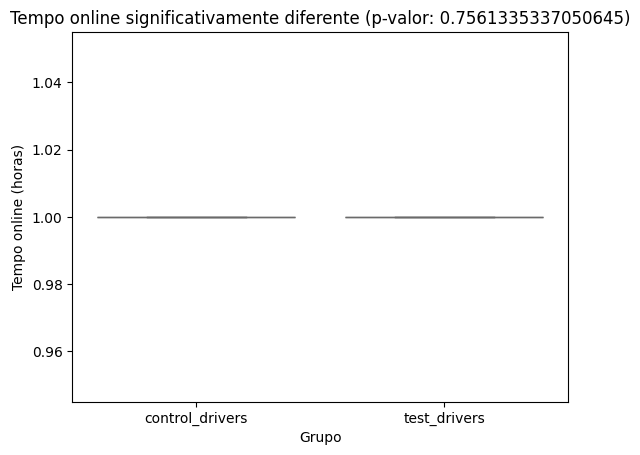

In [ ]:
# Criando um boxplot
sns.boxplot(x=grupo, y=metrica, data=dados_filtrados, palette="Set3")
plt.xlabel("Grupo")
plt.ylabel("Tempo online (horas)")

# Adicionando a significância no gráfico
if p_val_conversion <= sig_level_t:
    plt.title("Tempo online significativamente diferente (p-valor: " + str(p_val_conversion) + ")", fontsize=12)
else:
    plt.title("Tempo online não significativamente diferente (p-valor: " + str(p_val_conversion) + ")", fontsize=12)

plt.show()


## **E - Aplicar o teste estatístico para verificar se a diferença da métricas é significativa entre o grupo de controle e o grupo que recebeu incentivo de R$3,00**

In [ ]:
#Pega apenas o valor referente a métrica de segurança do grupo controle e do grupo teste das bases agrupadas
amostra_total_promo3 = len(amostra_voucher15)
amostra_convertida_promo3 = len(amostra_voucher15_filtrado)
amostra_total_controle = len(controle)
amostra_convertida_controle = len(amostra_controle_filtrada)


conv_control = amostra_convertida_controle / amostra_total_controle
conv_test_promo3 = amostra_convertida_promo3 / amostra_total_promo3

#Calcula a variancia da metrica de segurança para o grupo controle e para o grupo de tratamento -
#nesse caso como é uma taxa a forma de calcular é metrica*(1-metrica)
var_control = conv_control *(1-conv_control)
var_test = conv_test_promo3 *(1-conv_test_promo3)

#Define o valor de n como o tamanho da amostra
n_control = 3583
n_test = 3583
# Calcula o z-score, que é uma medida estatística que descreve a diferença entre as taxas de conversão dos dois grupos em termos de desvio padrão
z_score_promo3 = conv_test_promo3 - conv_control

#Calcula o valor-p associado ao z-score calculado anteriormente.
#O valor-p é uma medida estatística que ajuda a determinar a significância estatística da diferença observada entre os dois grupos.
#norm.sf() nos dá a probabilidade de observar um z-score tão extremo ou mais, assumindo que a hipótese nula (de que não há diferença entre as taxas de conversão dos grupos) é verdadeira.
#Se o valor-p calculado for menor que um limiar pré-definido (nível de significância), podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa entre as taxas dos dois grupos.
p_val_conversion_promo3 = 2 * norm.cdf(-abs(z_score_promo3))


#Define a significância
sig_level = 0.95

# Verificando se o valor-p é menor ou igual ao nível de significância para determinar se a diferença é estatisticamente significativa
if p_val_conversion_promo3 <= sig_level:
   print('✅ Conversão é significativamente diferente')
   print(p_val_conversion_promo3)
else:
  print('❌ Conversão não é significativamente diferente')

✅ Conversão é significativamente diferente
0.7760251436865925


### **E - Gráfico**

<ipython-input-29-32adb9e522e1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo", y="Taxa de Conversão", data=df_boxplot_promo3, palette=cores)


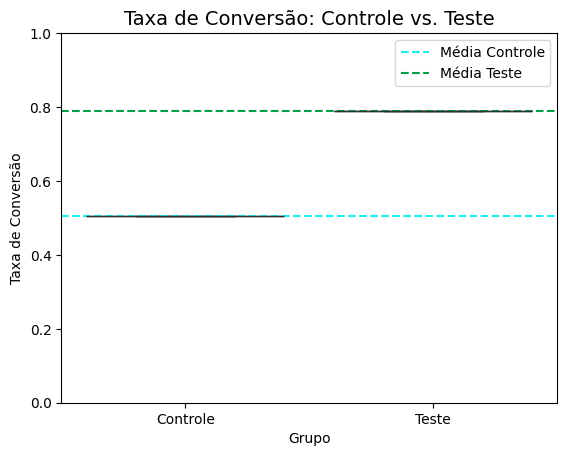

In [ ]:
# Criando um dataframe com as variáveis relevantes
df_boxplot_promo3 = pd.DataFrame({
    "Grupo": ["Controle", "Teste"],
    "Taxa de Conversão": [conv_control, conv_test_promo3]
})

# Definindo as cores do boxplot
cores = ["#20eeee", "#009e49"]


# Criando o boxplot
sns.boxplot(x="Grupo", y="Taxa de Conversão", data=df_boxplot_promo3, palette=cores)

# Ajustando o título
plt.title("Taxa de Conversão: Controle vs. Teste", fontsize=14)

# Ajustando os rótulos dos eixos
plt.xlabel("Grupo")
plt.ylabel("Taxa de Conversão")

# Adicionando linhas de referência para as médias
plt.axhline(conv_control, color=cores[0], linestyle="dashed", label="Média Controle")
plt.axhline(conv_test_promo3, color=cores[1], linestyle="dashed", label="Média Teste")

# Adicionando legenda
plt.legend(loc="best")

# Ajustando os limites do eixo y
plt.ylim([0, 1])

# Mostrando o gráfico
plt.show()


## **F - Aplicar o teste estatístico para verificar se a diferença de sucesso é significativa entre o grupo de controle e o grupo que recebeu incentivo de R$5,00**

In [ ]:
#Pega apenas o valor referente a métrica de segurança do grupo controle e do grupo teste das bases agrupadas
amostra_total_promo5 = len(amostra_voucher25)
amostra_convertida_promo5 = len(amostra_voucher25_filtrado)
amostra_total_controle = len(controle)
amostra_convertida_controle = len(amostra_controle_filtrada)


conv_control = amostra_convertida_controle / amostra_total_controle
conv_test_promo5 = amostra_convertida_promo5 / amostra_total_promo5

#Calcula a variancia da metrica de segurança para o grupo controle e para o grupo de tratamento -
#nesse caso como é uma taxa a forma de calcular é metrica*(1-metrica)
var_control = conv_control *(1-conv_control)
var_test = conv_test_promo5 *(1-conv_test_promo5)

#Define o valor de n como o tamanho da amostra
n_control = 3072
n_test = 3072
# Calcula o z-score, que é uma medida estatística que descreve a diferença entre as taxas de conversão dos dois grupos em termos de desvio padrão
z_score_promo5 = conv_test_promo5 - conv_control

#Calcula o valor-p associado ao z-score calculado anteriormente.
#O valor-p é uma medida estatística que ajuda a determinar a significância estatística da diferença observada entre os dois grupos.
#norm.sf() nos dá a probabilidade de observar um z-score tão extremo ou mais, assumindo que a hipótese nula (de que não há diferença entre as taxas de conversão dos grupos) é verdadeira.
#Se o valor-p calculado for menor que um limiar pré-definido (nível de significância), podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa entre as taxas dos dois grupos.
p_val_conversion_promo5 = 2 * norm.cdf(-abs(z_score_promo5))


#Define a significância
sig_level = 0.95

# Verificando se o valor-p é menor ou igual ao nível de significância para determinar se a diferença é estatisticamente significativa
if p_val_conversion_promo5 <= sig_level:
   print('✅ Conversão é significativamente diferente')
   print(p_val_conversion_promo5)
else:
  print('❌ Conversão não é significativamente diferente')

✅ Conversão é significativamente diferente
0.7327736787029899


### **F - Gráfico**

<ipython-input-34-74dc012e5e9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo", y="Taxa de Conversão", data=df_boxplot_promo5, palette=cores)


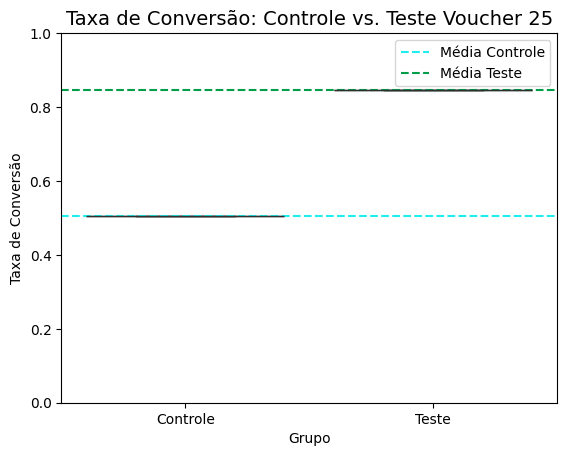

In [ ]:
# Criando um dataframe com as variáveis relevantes
df_boxplot_promo5 = pd.DataFrame({
    "Grupo": ["Controle", "Teste"],
    "Taxa de Conversão": [conv_control, conv_test_promo5]
})

# Definindo as cores do boxplot
cores = ["#20eeee", "#009e49"]

# Criando o boxplot
sns.boxplot(x="Grupo", y="Taxa de Conversão", data=df_boxplot_promo5, palette=cores)

# Ajustando o título
plt.title("Taxa de Conversão: Controle vs. Teste Voucher 25", fontsize=14)

# Ajustando os rótulos dos eixos
plt.xlabel("Grupo")
plt.ylabel("Taxa de Conversão")

# Adicionando linhas de referência para as médias
plt.axhline(conv_control, color=cores[0], linestyle="dashed", label="Média Controle")
plt.axhline(conv_test_promo5, color=cores[1], linestyle="dashed", label="Média Teste")

# Adicionando legenda
plt.legend(loc="best")

# Ajustando os limites do eixo y
plt.ylim([0, 1])

# Mostrando o gráfico
plt.show()


In [ ]:
print("taxa de conversão controle")
print(conv_control)
print("\n taxa de conversão voucher 15")
print(conv_test_promo3)
print("\n taxa de conversão voucher 25")
print(conv_test_promo5)
print("\n taxa de churn controle")
print(1-conv_control)
print("\n taxa de churn voucher 15")
print(1-conv_test_promo3)
print("\n taxa de churn voucher 25")
print(1-conv_test_promo5)



taxa de conversão controle
0.504500900180036

 taxa de conversão voucher 15
0.7890036282444879

 taxa de conversão voucher 25
0.8459391571308958

 taxa de churn controle
0.495499099819964

 taxa de churn voucher 15
0.2109963717555121

 taxa de churn voucher 25
0.15406084286910415
